# Initialization

In [3]:
using Statistics
using Distributions
using LinearAlgebra
using Plots
using Random

# Confidence, basically bare lidt hygge matstat i Julia

In [1]:
# Confidence interval for the sample mean
# bar(x) \pm T_{\alpha/2,n-1}\frac{\sigma}{\sqrt{n}}

function ConfSample(sample_mean,sample_std,n,alpha=0.95,max_n = 30)
    conf = []
    alpha = 1-alpha
    if n > max_n
        # Using Gaussian approximation
        append!(conf,sample_mean + quantile(Normal(),(alpha)/2)*sample_std/sqrt(n))
        append!(conf,sample_mean - quantile(Normal(),(alpha)/2)*sample_std/sqrt(n))
    else
        # Using t distribution
        append!(conf, sample_mean + quantile(TDist(n-1), (alpha)/2)*sample_std/sqrt(n))
        append!(conf, sample_mean - quantile(TDist(n-1), (alpha)/2)*sample_std/sqrt(n))
    end
    return conf
end

# n>= (z_{normal}\frac{\sigma}{w})^2
# z_{normal} is 1.96 for 0.95
function RequiredSample(sample_std,w,alpha=0.95)
    # takes sample std, maximum accepted width of conf interval and alpha
    # Spews out minimum number of required samples.
    # w = w/sample_mean
    n = ((1/w)*sample_std*quantile(Normal(),(1-alpha)/2))^2
    return n
end


RequiredSample (generic function with 2 methods)

In [44]:
# Problem 1 Week 5
RequiredSample(0.23,0.1)

20.321317161472

# Discrete Event

# Monte Carlo

# Excersizes week 5

### Problem 2

In [56]:
#Problem 2

# Question 1
struct Environment
    omegax::Uniform
    omegay::Uniform
    cost::Float64
    r::Float64

    Environment() = new(Uniform(-1,1),Uniform(-1,1),4,1)
end

# Question 2,3 and 4
function EstimatePi(n=10)
    sampling = Environment()
    omegaxi = rand(sampling.omegax,n)
    omegayi = rand(sampling.omegay,n)

    c = (sqrt.(omegaxi .^2 .+ omegayi .^2)) .<= sampling.r
    c = sampling.cost .* c
    est = mean(c)
    # println("Pi estimate with: ",n," samples is: ",est)

    # Question 4
    conf = ConfSample(est,std(c),n)

    println("Pi estimate with: ",n," samples is: ",est, " and confidence interval: ",conf)
    return est
end

# Question 5
EstimatePi(10000000)



Pi estimate with: 10000000 samples is: 3.1418084 and confidence interval: Any[3.140790675825492, 3.142826124174508]


3.1418084

### Problem 3

In [50]:
# Question 1,2 and 3 and 4 and 5
function pakkeleg(n,profit)
    winners = [0,0]
    for i in 1:n
        i = 0
        win = 0
        while win == 0
            if rand(Multinomial(1,6),1)[6] == 1
                win = 1
            end
            i += 1
        end

        if iseven(i)
            winners[2] += 1
        else
            winners[1] += 1
        end
    end
    s = sum(winners)
    prob_first = winners[1]/n
    prob_second = 1 - prob_first
    util = [prob_first * profit, prob_second * profit]
    # println("wins: ",winners," and profit: ",util)
    return winners,util
end


pakkeleg (generic function with 1 method)

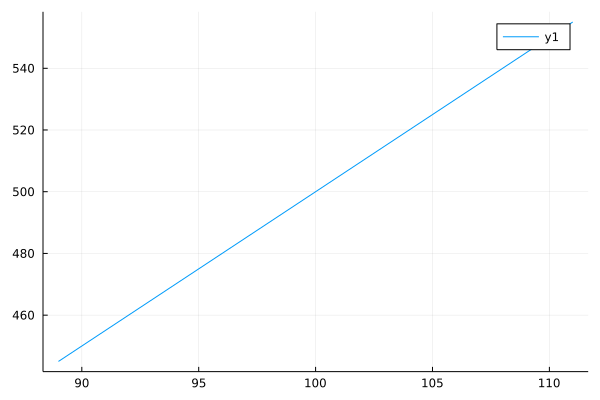

In [53]:
# N = [10,100,200,500,1000,2000,5000,10000,20000]

# win = []
# loss = []
# begin
#     plot(pakkeleg(N[1],1000))
#     for i in 2:length(N)
#         plot!(pakkeleg(N[i],1000))
#     end
# end

# plot(pakkeleg(N[3],1000))

# FOR PLOTS Tjek hans svar, er ikke super til plots



### Problem 4

In [ ]:
tau = readdlm("interestratesdata.csv",',',Float64)

4.637985537772075
Expected value: 4.490807591648745, Std: 0.060338489615608774, Confidence: Any[4.487067842036694, 4.494547341260796]


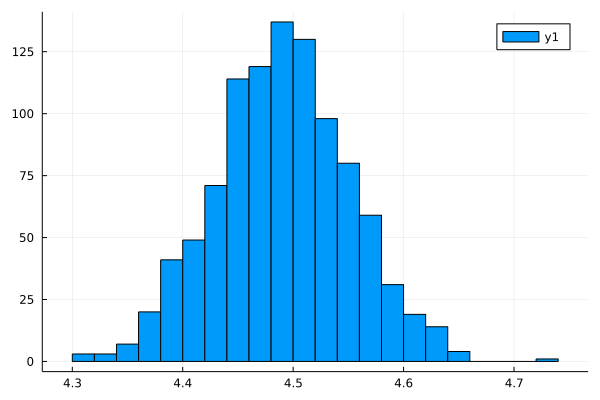

In [48]:

function FixedInterest(a0,tau,m)
    ai = a0
    taui = tau/100
    y = []
    for i in 1:m
        yi = ai*(1/(m-i+1))
        ai = (ai-yi)*(1+taui)
        append!(y,yi)
    end
    println(sum(y))
end

FixedInterest(4,1,30)

function LoadedInterest(a0,tau,m)
    full = []
    for j in 1:length(tau[:,1])
        ai = a0
        y = []
        for i in 1:m
            yi = ai*(1/(m-i+1))
            ai = (ai-yi)*(1+tau[j,i]/100)
            append!(y,yi)
        end
        append!(full,sum(y))
    end
    conf = ConfSample(mean(full),std(full),length(full))

    println("Expected value: ",mean(full),", Std: ",std(full),", Confidence: ",conf)
    histogram(full)
end

LoadedInterest(4,tau,30)



# Excersize week 6

## Problem 1

In [4]:
que = [0 1 2 3 2 3 4 3 2 1 2 3 4 3 2 1]
mean(que)

wait = [4-1 7-2 8-3 9-5 13-6 14-10 15-11 16-12]
mean(wait)

4.5

## Problem 2

In [89]:
# Problem 2
# gamma(4,2)
N = 5
n = 20
p1 = 0.5 # 4
p2 = 0.4 # more than 4
p3 = 0.1 # less than 4

# Event: Person eating chocolate
# State: amount of chocolate

struct coco
    delta::Gamma
    q::Multinomial

    coco() = new(Gamma(4,2),Multinomial(1, [p1,p2,p3]))
end


function cocoEvent(n)

    numCoco = Vector{Integer}()
    push!(numCoco,0)

    tot = Vector{Float64}()
    push!(tot,0)

    event = coco()

    timei = rand(event.delta)
    qi = rand(event.q)
    time_total = 0
    i = 0

    while i <= n
        timei = rand(event.delta)
        qi = rand(event.q)
        
        if qi[1] == 1
            pop = 4
        elseif qi[2] == 1
            pop = 6
        elseif qi[3] == 1
            pop = 3
        end

        if i + pop > n
            break
        end

        time_total += timei
        append!(tot,time_total)
        i += pop
        append!(numCoco,i)
        
    end
    #println("Stykker: ",i," tid: ",time_total)
    return [tot,numCoco]
end

#out = cocoEvent(20)
#println(out)
#plot(out[1],out[2],linetype=:steppost,label=L"s_t",xlabel="time [hours]",ylabel="Number of squares eaten")

function repyboy(nrep,n,Mr)
    time = Vector{Float64}()
    nPep = Vector{Integer}()
    person = Vector{Integer}()

    for i in 1:nrep
        o = cocoEvent(n)
        a = length(o)
        append!(time,o[1][a])
        append!(nPep,length(o[2])-1)

        # n-person
        if length(o[2]) >= Mr
            append!(person,o[2][Mr]-o[2][Mr-1])
        end
        
    end
    m_time = mean(time) 
    m_pep = mean(nPep)
    m_person = mean(person)
    b = [(i, count(==(i), person)) for i in unique(person)]
    println(b)
    #b ./ length(person)
    
    # Precentage
    mf = 100*(1-length(person)/nrep)

    return(mf,m_person)
end

repyboy(1000,20,5)



[(4, 465), (3, 90), (6, 270)]


(17.500000000000004, 4.545454545454546)

## Problem 3

7
74.07407407407408


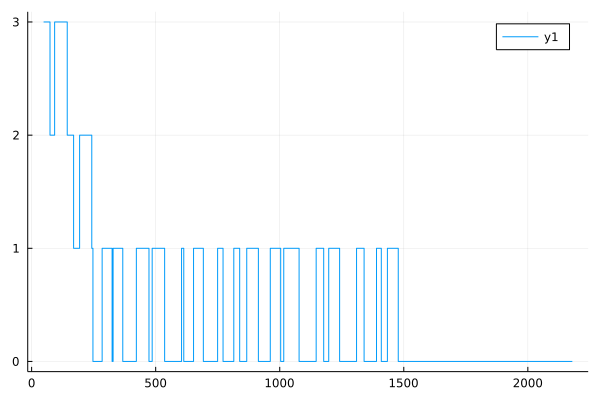

In [180]:

# Forkert!!!

struct pan
    eat::Gamma
    make::Gamma

    pan() = new(Gamma(30,1.8),Gamma(50,1.5))
end

function sPan(n_start,N)
    time_eat = Vector{Float64}()
    time_make = Vector{Float64}()

    events = pan()

    ea = rand(events.eat)
    pr = rand(events.make)
    append!(time_eat,ea)
    append!(time_make,pr)
    for i in 1:N
        ea = rand(events.eat)
        pr = rand(events.make)
        append!(time_eat,ea+time_eat[i])
        append!(time_make,pr+time_make[i])
    end

    pancakes = Vector{Integer}()
    push!(pancakes,n_start)
    o = 1
    p = 1
    unsatisfied = 0 

    for j in 1:length(time_eat)*2-1

        
        if o <= length(time_eat) && p <= length(time_make)

            if time_eat[o] <= time_make[p]

                if pancakes[j] == 0
                    unsatisfied += 1
                    append!(pancakes,0+pancakes[j])
                    o += 1
                else
                    append!(pancakes,-1+pancakes[j])
                    o += 1
                end

            elseif time_eat[o] > time_make[p]
                append!(pancakes,1+pancakes[j])
                p += 1
            end


        elseif p > length(time_make)
            append!(pancakes,-1+pancakes[j])
            o += 1

        elseif o > length(time_make)
            append!(pancakes,0+pancakes[j])
            p += 1

        else
            break
        end
    end
    satisfied_pct = 100*(1-unsatisfied/N)
    println(unsatisfied)
    println(satisfied_pct)

    return sort(append!(time_make,time_eat)), pancakes, satisfied_pct
end

out = sPan(3,27)

plot(out[1],out[2],linetype=:steppost)




In [126]:

function loopPan(n_start,N,m_rep)
    sat = Vector{Float64}()
    

    for i in 1:m_rep
        sPan(n_start,N)
        



end



ErrorException: syntax: incomplete: "function" at c:\Users\rasmu\Desktop\OneDrive\OneDrive - Danmarks Tekniske Universitet\Decisions under uncertainty\Decisions_pushing\Simulation.ipynb:2 requires end